In [3]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import iqr
import matplotlib.pyplot as pt

In [5]:
e_cars=pd.read_csv('/content/drive/MyDrive/E_data.csv')
e_cars

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
e_cars.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
e_cars.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480.0,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [ ]:
e_cars.shape

(103, 14)

In [ ]:
e_cars.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
e_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


In [ ]:
e_cars.isnull()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
e_cars.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Length: 103, dtype: bool

In [6]:
e_cars.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
print(e_cars[e_cars['FastCharge_KmH'].isnull()])

       Brand              Model  AccelSec  TopSpeed_KmH  Range_Km  \
57  Renault           Twingo ZE      12.6           135       130   
68  Renault   Kangoo Maxi ZE 33      22.4           130       160   
77    Smart         EQ forfour       12.7           130        95   
82    Smart     EQ fortwo coupe      11.6           130       100   
91    Smart    EQ fortwo cabrio      11.9           130        95   

    Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain PlugType  \
57              164             NaN          No        RWD   Type 2   
68              194             NaN          No        FWD   Type 2   
77              176             NaN          No        RWD   Type 2   
82              167             NaN          No        RWD   Type 2   
91              176             NaN          No        RWD   Type 2   

    BodyStyle Segment  Seats  PriceEuro  
57  Hatchback       A      4      24790  
68        SPV       N      5      38000  
77  Hatchback       A      4    

In [8]:
e_cars["FastCharge_KmH"].fillna(e_cars['FastCharge_KmH'].mean(),inplace=True)

In [9]:
e_cars.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [10]:
e_cars.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,196.268002,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,305.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,450.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [11]:
e_cars.describe(include='all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103.000000,103.000000,103.000000,103.000000,103.000000,103,103,103,103,103,103.000000,103.000000
unique,33,102,NaN,NaN,NaN,NaN,NaN,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,NaN,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,NaN,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.396117,179.194175,338.786408,189.165049,456.734694,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,3.017430,43.573030,126.014444,29.566839,196.268002,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,2.100000,123.000000,95.000000,104.000000,170.000000,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,5.100000,150.000000,250.000000,168.000000,305.000000,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,7.300000,160.000000,340.000000,180.000000,450.000000,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,9.000000,200.000000,400.000000,203.000000,555.000000,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


In [13]:
print(e_cars[(e_cars['RapidCharge'])=='No'])

       Brand              Model  AccelSec  TopSpeed_KmH  Range_Km  \
57  Renault           Twingo ZE      12.6           135       130   
68  Renault   Kangoo Maxi ZE 33      22.4           130       160   
77    Smart         EQ forfour       12.7           130        95   
82    Smart     EQ fortwo coupe      11.6           130       100   
91    Smart    EQ fortwo cabrio      11.9           130        95   

    Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain PlugType  \
57              164      456.734694          No        RWD   Type 2   
68              194      456.734694          No        FWD   Type 2   
77              176      456.734694          No        RWD   Type 2   
82              167      456.734694          No        RWD   Type 2   
91              176      456.734694          No        RWD   Type 2   

    BodyStyle Segment  Seats  PriceEuro  
57  Hatchback       A      4      24790  
68        SPV       N      5      38000  
77  Hatchback       A      4    

In [14]:
e_cars.mean(numeric_only=True)

AccelSec               7.396117
TopSpeed_KmH         179.194175
Range_Km             338.786408
Efficiency_WhKm      189.165049
FastCharge_KmH       456.734694
Seats                  4.883495
PriceEuro          55811.563107
dtype: float64

In [15]:
e_cars.mode(numeric_only=True)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,9.0,150,250,168.0,230.0,5.0,45000.0
1,NaN,160,400,NaN,NaN,NaN,NaN


In [16]:
e_cars.median(numeric_only=True)

AccelSec               7.3
TopSpeed_KmH         160.0
Range_Km             340.0
Efficiency_WhKm      180.0
FastCharge_KmH       450.0
Seats                  5.0
PriceEuro          45000.0
dtype: float64

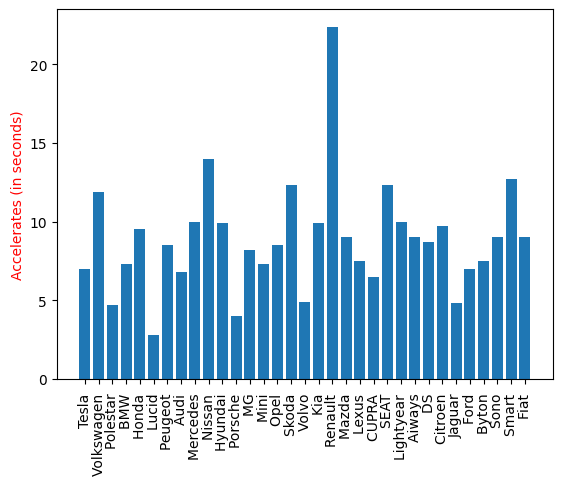

In [20]:
pt.bar(e_cars['Brand'],e_cars['AccelSec'])
pt.xticks(rotation=90)
pt.ylabel("Accelerates (in seconds)",color='r')
pt.show()

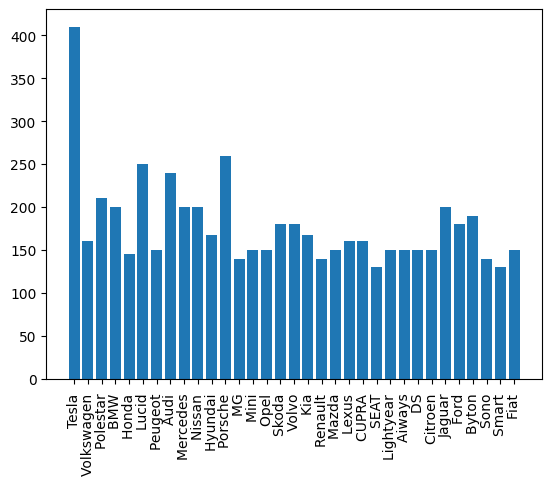

In [21]:
pt.bar(e_cars['Brand'],e_cars['TopSpeed_KmH'])
pt.xticks(rotation=90)
pt.show()

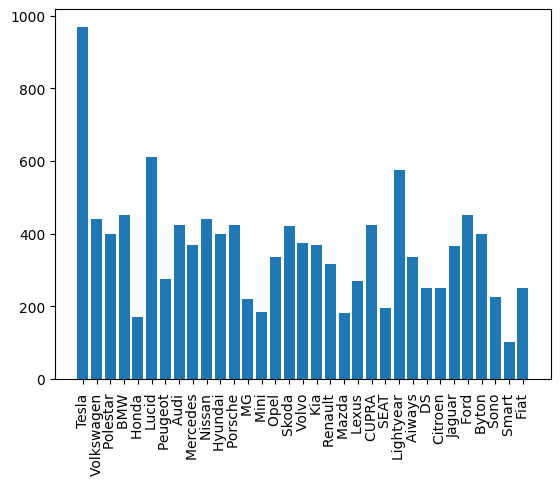

In [22]:
pt.bar(e_cars['Brand'],e_cars['Range_Km'])
pt.xticks(rotation=90)
pt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

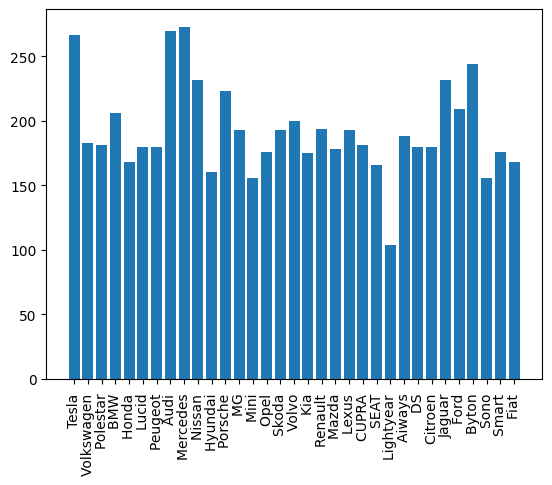

In [23]:
pt.bar(e_cars['Brand'],e_cars['Efficiency_WhKm'])
pt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

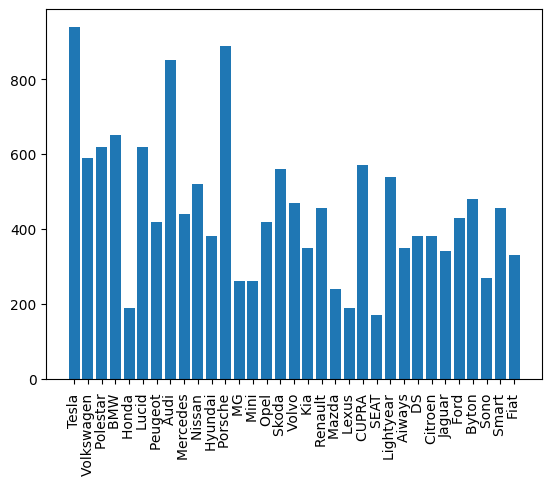

In [24]:
pt.bar(e_cars['Brand'],e_cars['FastCharge_KmH'])
pt.xticks(rotation=90)

['Yes' 'No']
5
98


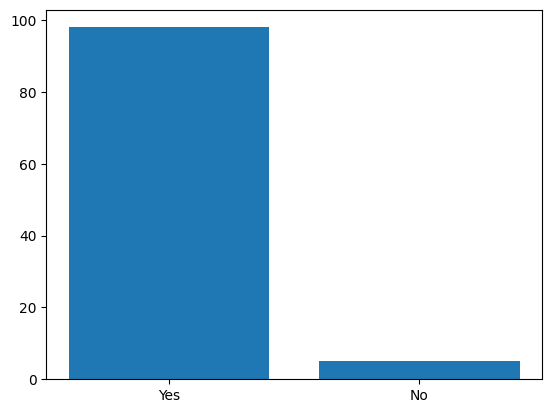

In [25]:
print(e_cars['RapidCharge'].unique())
print(e_cars['RapidCharge'].value_counts()['No'])
print(e_cars['RapidCharge'].value_counts()['Yes'])
ry=['Yes','No']
rx=[98,5]
pt.bar(ry,rx)
pt.show()

['AWD' 'RWD' 'FWD']
41
25
37


<BarContainer object of 3 artists>

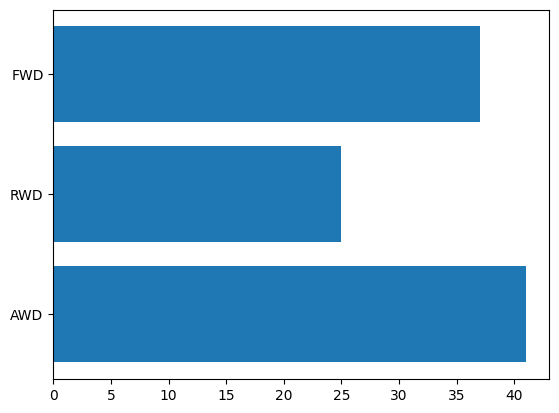

In [26]:
print(e_cars['PowerTrain'].unique())
print(e_cars['PowerTrain'].value_counts()['AWD'])
print(e_cars['PowerTrain'].value_counts()['RWD'])
print(e_cars['PowerTrain'].value_counts()['FWD'])
p=['AWD','RWD','FWD']
q=[41,25,37]
pt.barh(p,q)

['Type 2 CCS' 'Type 2 CHAdeMO' 'Type 2' 'Type 1 CHAdeMO']
90
9
3
1


<BarContainer object of 4 artists>

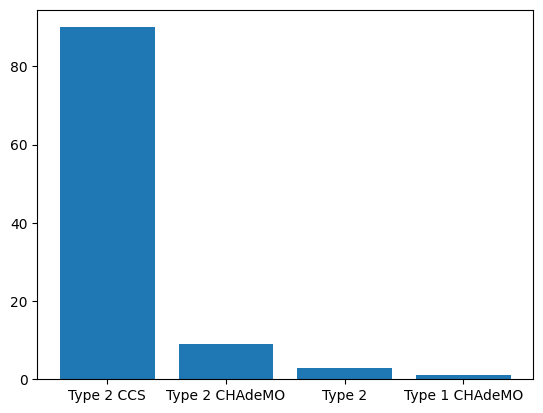

In [27]:
print(e_cars['PlugType'].unique())
print(e_cars['PlugType'].value_counts()['Type 2 CCS'])
print(e_cars['PlugType'].value_counts()['Type 2'])
print(e_cars['PlugType'].value_counts()['Type 2 CHAdeMO'])
print(e_cars['PlugType'].value_counts()['Type 1 CHAdeMO'])
x=['Type 2 CCS','Type 2 CHAdeMO','Type 2','Type 1 CHAdeMO']
y=[90,9,3,1]
pt.bar(x,y)

['D' 'C' 'B' 'F' 'A' 'E' 'N' 'S']
15
30
22
12
7
10
6
1


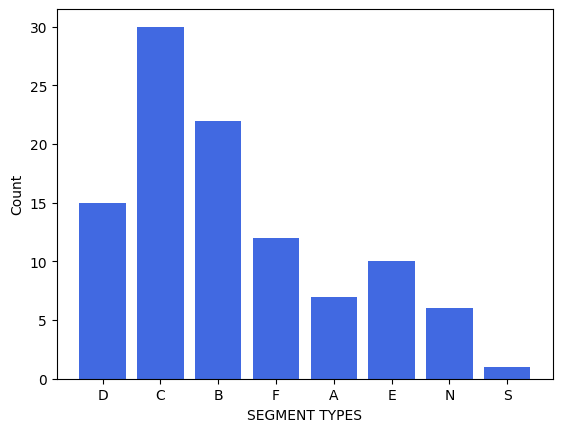

In [28]:
print(e_cars['Segment'].unique())
print(e_cars['Segment'].value_counts()['D'])
print(e_cars['Segment'].value_counts()['C'])
print(e_cars['Segment'].value_counts()['B'])
print(e_cars['Segment'].value_counts()['F'])
print(e_cars['Segment'].value_counts()['A'])
print(e_cars['Segment'].value_counts()['E'])
print(e_cars['Segment'].value_counts()['N'])
print(e_cars['Segment'].value_counts()['S'])
sx=['D','C','B','F','A','E','N','S']
sy=[15,30,22,12,7,10,6,1]
pt.bar(sx,sy,color='royalblue')
pt.xlabel('SEGMENT TYPES')
pt.ylabel('Count')
pt.show()

[5 4 7 6 2]
71
21
6
3
2


Text(0, 0.5, 'Count')

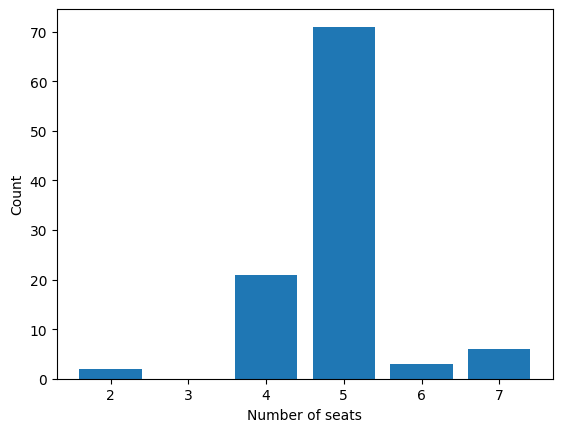

In [29]:
print(e_cars['Seats'].unique())
print(e_cars['Seats'].value_counts()[5])
print(e_cars['Seats'].value_counts()[4])
print(e_cars['Seats'].value_counts()[7])
print(e_cars['Seats'].value_counts()[6])
print(e_cars['Seats'].value_counts()[2])
s=[5,4,7,6,2]
s1=[71,21,6,3,2]

pt.bar(s,s1)
pt.xlabel("Number of seats")
pt.ylabel("Count")

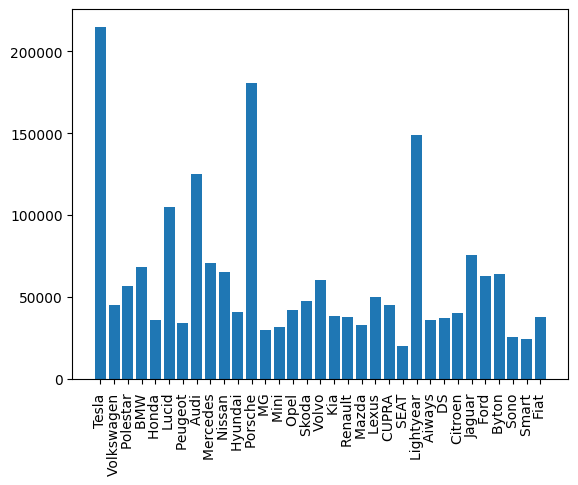

In [30]:
pt.bar(e_cars['Brand'],e_cars['PriceEuro'])
pt.xticks(rotation=90)
pt.show()

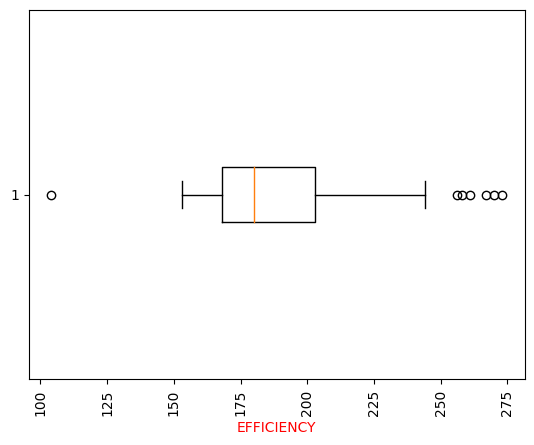

In [33]:
pt.boxplot(e_cars['Efficiency_WhKm'],vert=False)
pt.xticks(rotation=90)
pt.xlabel('EFFICIENCY',color='r')
pt.show()

['AWD' 'RWD' 'FWD']
41
25
37


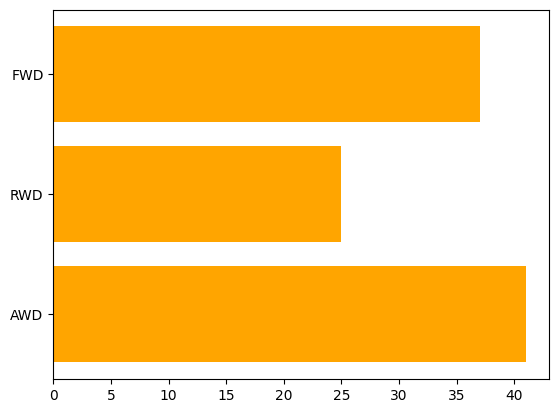

In [34]:
print(e_cars['PowerTrain'].unique())
print(e_cars['PowerTrain'].value_counts()['AWD'])
print(e_cars['PowerTrain'].value_counts()['RWD'])
print(e_cars['PowerTrain'].value_counts()['FWD'])
p=['AWD','RWD','FWD']
q=[41,25,37]
pt.barh(p,q,color='orange')
pt.show()


In [35]:
tesla_data=pd.DataFrame(e_cars[e_cars['Brand'] == "Tesla "])
print(tesla_data)

     Brand                           Model  AccelSec  TopSpeed_KmH  Range_Km  \
0   Tesla    Model 3 Long Range Dual Motor       4.6           233       450   
8   Tesla      Model 3 Standard Range Plus       5.6           225       310   
21  Tesla    Model Y Long Range Dual Motor       5.1           217       425   
24  Tesla   Model 3 Long Range Performance       3.4           261       435   
33  Tesla             Cybertruck Tri Motor       3.0           210       750   
40  Tesla               Model S Long Range       3.8           250       515   
51  Tesla                        Roadster        2.1           410       970   
54  Tesla               Model X Long Range       4.6           250       450   
59  Tesla              Model S Performance       2.5           261       505   
61  Tesla   Model Y Long Range Performance       3.7           241       410   
67  Tesla            Cybertruck Dual Motor       5.0           190       460   
81  Tesla              Model X Performan

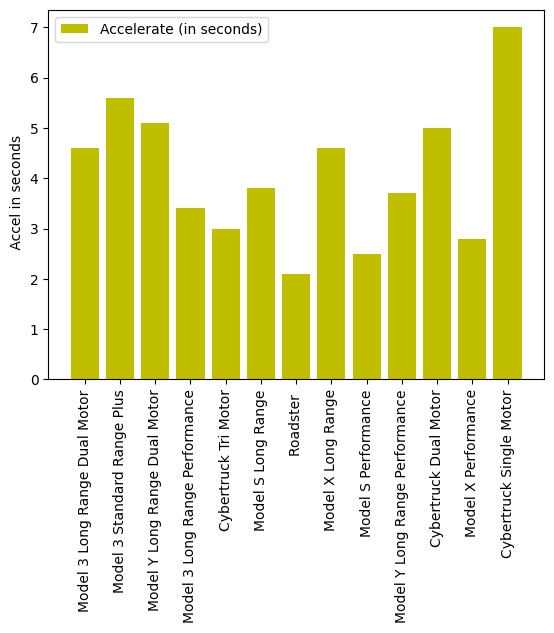

In [46]:
pt.bar(tesla_data['Model'],tesla_data['AccelSec'],color='y',label='Accelerate (in seconds)')
pt.ylabel(" Accel in seconds")
pt.xticks(rotation=90)
pt.legend()
pt.show()

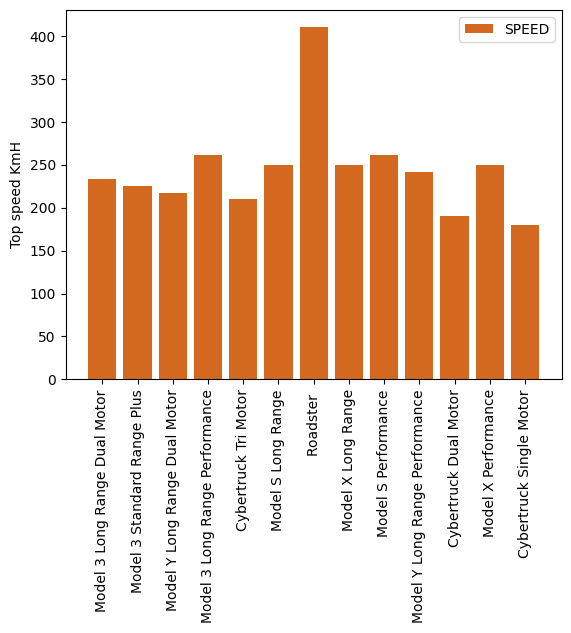

In [45]:
pt.bar(tesla_data['Model'],tesla_data['TopSpeed_KmH'],color='chocolate',label='SPEED')
pt.ylabel("Top speed KmH")
pt.xticks(rotation=90)
pt.legend()
pt.show()

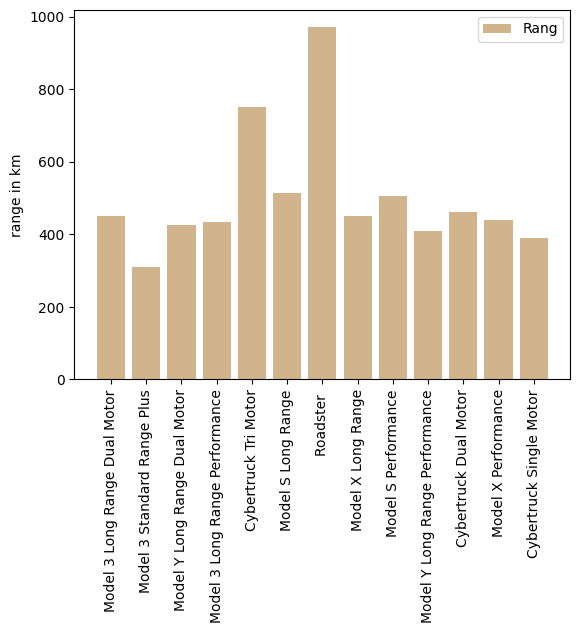

In [44]:
pt.bar(tesla_data['Model'],tesla_data['Range_Km'],color='tan',label='Rang')
pt.ylabel('range in km')
pt.xticks(rotation=90)
pt.legend()
pt.show()

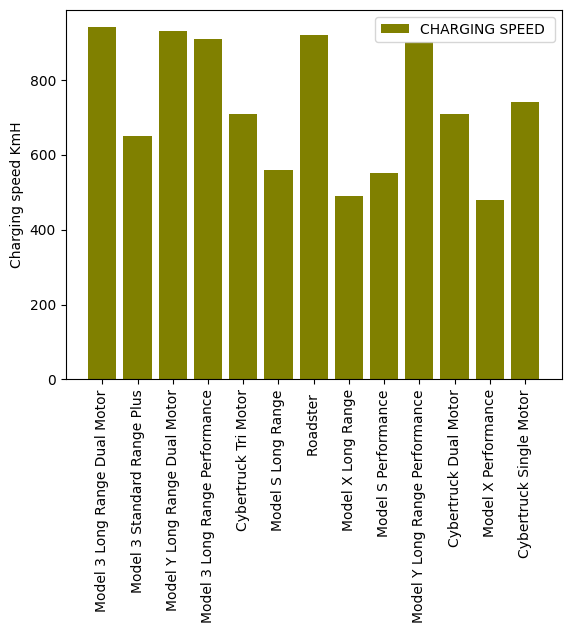

In [43]:
pt.bar(tesla_data['Model'],tesla_data['FastCharge_KmH'],color='olive',label='CHARGING SPEED ')
pt.ylabel("Charging speed KmH")
pt.xticks(rotation=90)
pt.legend()
pt.show()

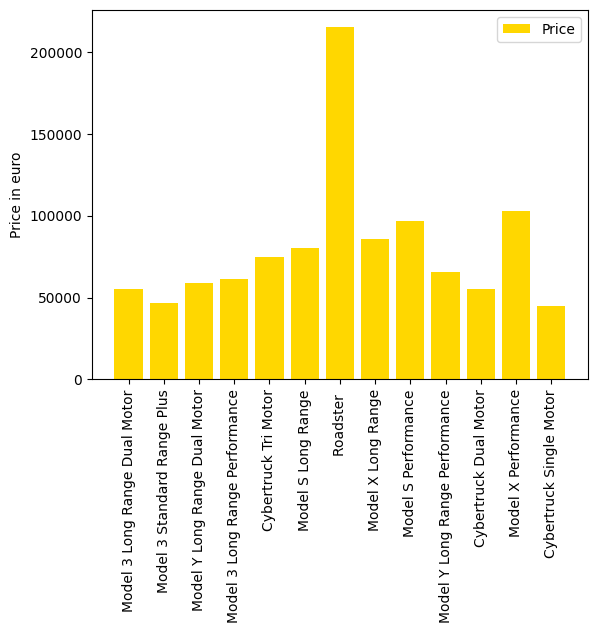

In [42]:
pt.bar(tesla_data['Model'],tesla_data['PriceEuro'],color='gold',label='Price')
pt.ylabel("Price in euro")
pt.xticks(rotation=90)
pt.legend()
pt.show()

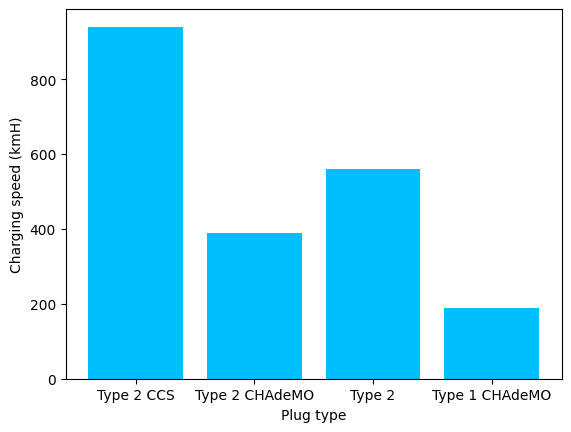

In [50]:
pt.bar(e_cars['PlugType'],e_cars['FastCharge_KmH'],color='deepskyblue')
pt.xlabel('Plug type')
pt.ylabel("Charging speed (kmH)")
pt.show()



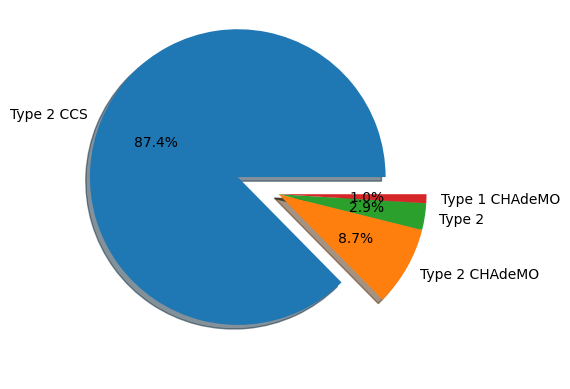

In [55]:
x=['Type 2 CCS','Type 2 CHAdeMO','Type 2','Type 1 CHAdeMO']
y=[90,9,3,1]
ex=[0.3,0.0,0.0,0.0]
pt.pie(y,labels=x,explode=ex,autopct='%0.1f%%',shadow=True)
pt.show()

['D' 'C' 'B' 'F' 'A' 'E' 'N' 'S']
15
30
22
12
7
10
6
1


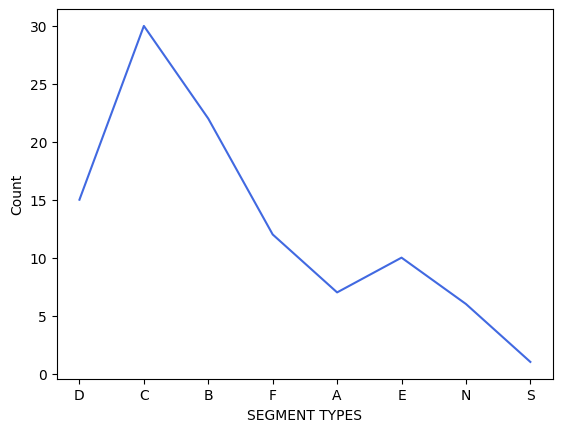

In [57]:
print(e_cars['Segment'].unique())
print(e_cars['Segment'].value_counts()['D'])
print(e_cars['Segment'].value_counts()['C'])
print(e_cars['Segment'].value_counts()['B'])
print(e_cars['Segment'].value_counts()['F'])
print(e_cars['Segment'].value_counts()['A'])
print(e_cars['Segment'].value_counts()['E'])
print(e_cars['Segment'].value_counts()['N'])
print(e_cars['Segment'].value_counts()['S'])
sx=['D','C','B','F','A','E','N','S']
sy=[15,30,22,12,7,10,6,1]
pt.plot(sx,sy,color='royalblue')
pt.xlabel('SEGMENT TYPES')
pt.ylabel('Count')
pt.show()


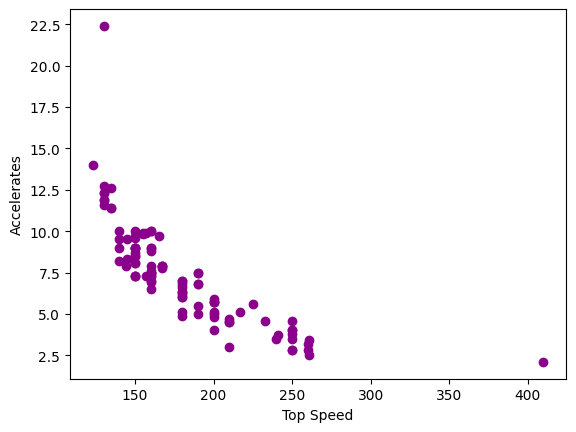

In [60]:
pt.scatter(e_cars['TopSpeed_KmH'],e_cars['AccelSec'],color='darkmagenta')
pt.xlabel("Top Speed")
pt.ylabel("Accelerates")
pt.show()

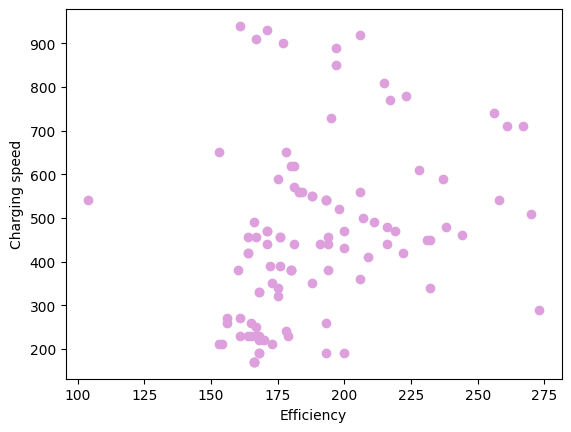

In [59]:
pt.scatter(e_cars['Efficiency_WhKm'],e_cars['FastCharge_KmH'],color='plum')
pt.xlabel("Efficiency")
pt.ylabel("Charging speed")
pt.show()
